# Машинное обучение, DS-поток, осень 2022
## Задание 3.3


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 30 баллов;
* Задача 3 &mdash; 70 баллов;
* Задача 4 &mdash; 80 баллов.

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import warnings
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import metrics

warnings.filterwarnings("ignore")

---
## Задача 1.

Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор для Ridge-регрессии. Что можно сказать о влиянии параметра регуляризации?

---
## Задача 2.

Исследуем Elastic-регрессию.

**1.** Визуализируйте множество, которое ограничивает коэффициенты в Elastic-регрессии.

**2.** Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор.

Какой вы можете видеть эффект при изменении параметра регуляризации и в чем
его отличие от лассо-регрессии?

**3.** Выпишите формулы для градиентного и стохастического спуска

---
## Задача 3.

Вам предлагается сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn.

Скачайте данные <a href="https://dasl.datadescription.com/datafile/cost-of-living-2018/?_sfm_cases=539+541">`cost of living 2018`</a>, в которых используйте следующие столбцы:
* `City` &mdash; город, данные для которого приводятся.
* `Cost of Living Index` &mdash; является относительным показателем цен на потребительские товары, включая продукты, рестораны, транспорт и коммунальные услуги. Cost of Living Index не включает расходы на проживание, такие как аренда или ипотека. Если город имеет индекс стоимости жизни 120, это означает, что Numbeo оценивает его на 20% дороже, чем Нью-Йорк.

* `Rent Index` &mdash; это оценка цен на аренду квартир в городе по сравнению с Нью-Йорком. Если индекс арендной платы равен 80, Numbeo оценивает, что цена аренды в этом городе в среднем на 20% меньше, чем цена в Нью-Йорке.

* `Cost of Living Plus Rent Index` &mdash; это оценка цен на потребительские товары, включая арендную плату, по сравнению с Нью-Йорком.

* `Restaurant Price Index` &mdash; сравнение цен на блюда и напитки в ресторанах и барах по сравнению с Нью-Йорк.

* `Local Purchasing Power Index` &mdash; показывает относительную покупательную способность при покупке товаров и услуг в данном городе за среднюю заработную плату в этом городе. Если внутренняя покупательная способность составляет 40, это означает, что жители этого города со средней зарплатой могут позволить себе покупать в среднем на 60% меньше товаров и услуг, чем жители Нью-Йорка со средней зарплатой по Нью-Йорку.

* `Groceries Index` &mdash; это оценка цен на продукты в городе по сравнению с Нью-Йорком. Для расчета этого раздела Number использует веса товаров в разделе "Рынки" для каждого города.

In [20]:
data = pd.read_csv('cost-of-living-2018.txt', sep='\t')
data = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
    'Groceries Index'
]]
data.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Restaurant Price Index,Local Purchasing Power Index,Groceries Index
0,145.43,110.87,128.76,158.75,112.26,143.47
1,141.25,66.14,105.03,135.76,142.70,149.86
2,134.83,71.70,104.38,129.74,130.96,138.98
3,130.68,49.68,91.61,127.22,139.01,127.54
4,128.03,43.57,87.30,119.48,112.71,132.70


**1.** Задача заключается в построении предсказания `Groceries Index` по известным значениям остальных параметров. Разделите данные на признаки $X$ и таргет $y$.

In [21]:
X = data[['Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index']]
y = data[['Groceries Index']]

Разбейте данные на обучающую и тестирующие выборки в соотношении 7:3 с помощью `train_test_split`</a> из sklearn. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** **Исправлено:** Стандартизация признаков необходима, так как каждый признак может находиться в своих единицах измерения (например цены на квартиры можно писать в тысячах рублей, а можно в миллионах). При регуляризации же наши признаки будут складываться, что неправильно по причине выбора множетсва единиц измерения.

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, **обученный на обучающей выборке**.

In [23]:
scaler = StandardScaler()
# стандартизация
X_train_standard = pd.DataFrame(scaler.fit_transform(X_train))
X_train_standard.columns = X_train.columns
X_test_standard = pd.DataFrame(scaler.transform(X_test))
X_test_standard.columns = X_test.columns

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Для Elastic также исследуйте зависимость от параметра `l1_ratio`. Нарисуйте графики, используя код с семинара. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

In [44]:
def draw_track(model, X, y, log_min, log_max, num, title='', figsize=(12, 6)):
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    
    :param model: модель
    :param X: регрессоры
    :param y: отклик
    :param log_min: десятичный логарифм 
        минимального значения коэффициента регуляризации
    :param log_max: десятичный логарифм 
        максимального значения коэффициента регуляризации
    :param num: количество элементов в сетке для коэффициента регуляризации
    :param title: заголовок графика
    :param figsize: размер полотна
    """
    
    alphas = np.logspace(log_min, log_max, num)   
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        coefs.append(model.coef_)

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xscale('log')
    plt.xlabel('alpha', fontsize=19)
    plt.ylabel('weights', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=15)
    plt.axis('tight')
    plt.show()

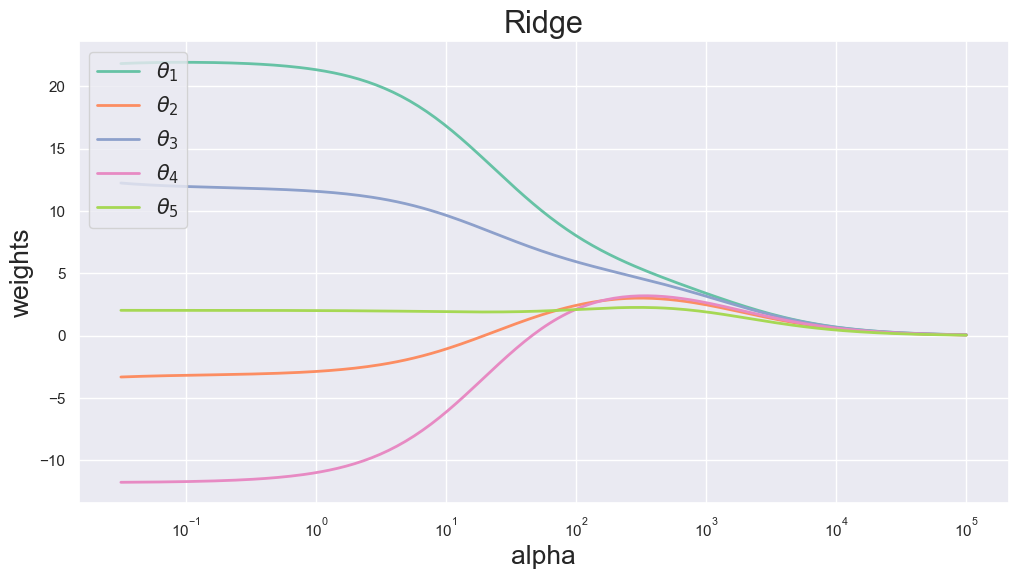

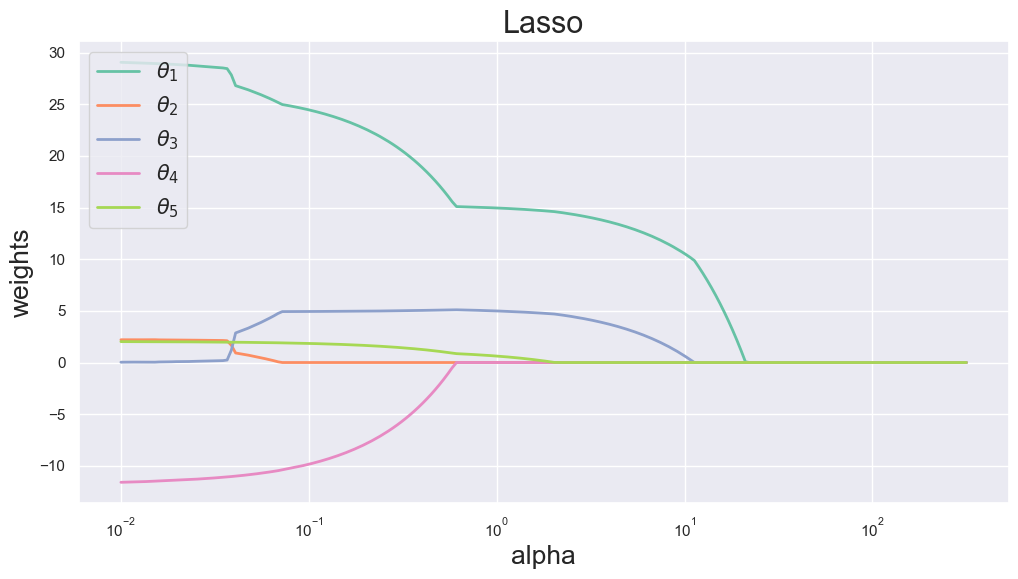

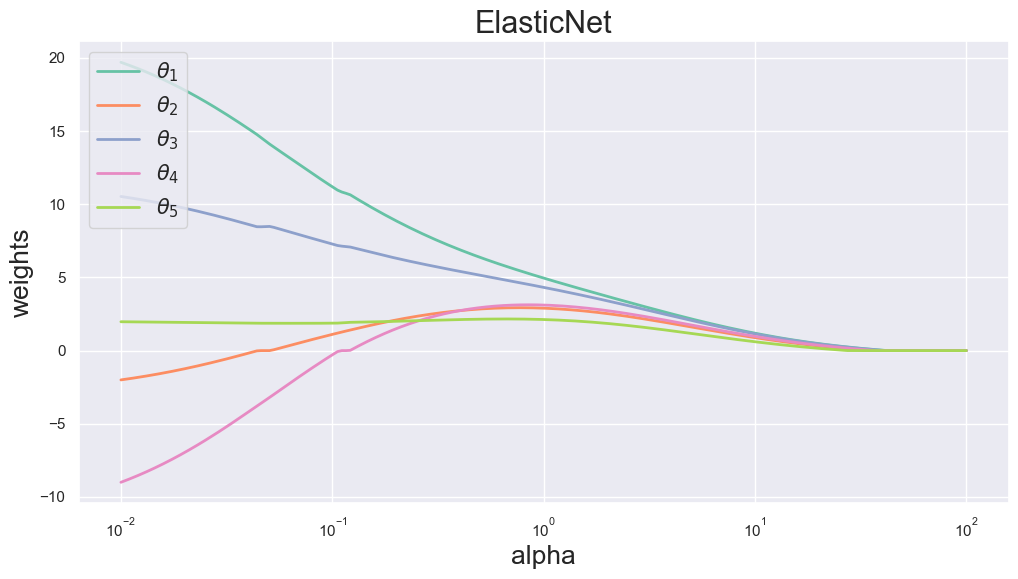

In [46]:
draw_track(Ridge(), np.array(X_train_standard), np.array(y_train['Groceries Index']),
           -1.5, 5, 200, title='Ridge')
draw_track(Lasso(), X_train_standard, y_train, -2, 2.5, 200, 
           title='Lasso')
draw_track(ElasticNet(l1_ratio=1/3), X_train_standard, y_train, -2, 2, 200, 
           title='ElasticNet')

Для Ridge регрессии можно выделить интервал (0, 10), тк при alpha = 10 параметры уже становятся похожими друг на друга и их будет довольно трудно отличать. При больших alpha Ridge регрессия дает плохие результаты.  
Для Lasso регрессии можно выделить интервал (0, 3), при больших значениях alpha занулится уже достаточно много параметров, что нехорошо для предсказаний. При больших alpha Lasso регрессия дает плохие результаты.  
Для ElasticNet регрессии можно выделить интервал (0, 0.5), тк при больших значениях параметры становятся похожими друг на друга.

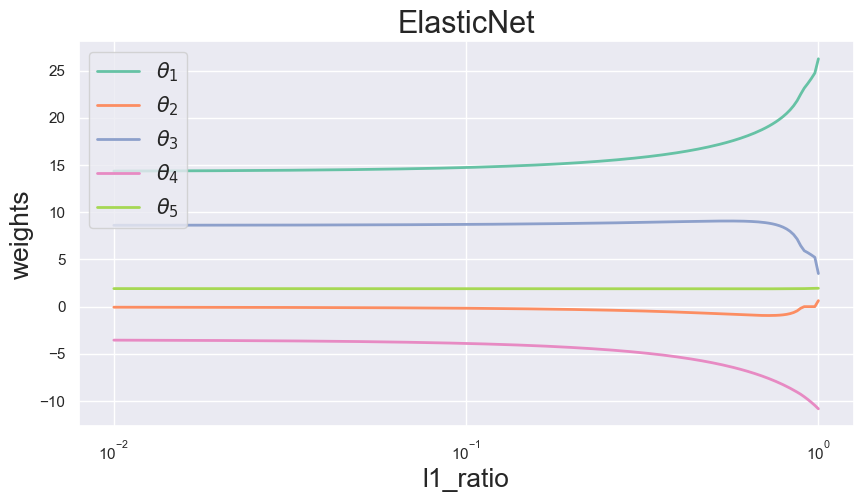

In [47]:
model = ElasticNet(alpha = 0.05)
l1_rations = np.logspace(-2, 0, 200)   
coefs = []
for ration in l1_rations:
    model.set_params(l1_ratio = ration)
    model.fit(X_train_standard, y_train)
    coefs.append(model.coef_)
    
plt.figure(figsize=(10, 5))
ax = plt.gca()
ind = 1
for coef in np.array(coefs).T:
    label = r'$\theta_{' + str(ind) + '}$'
    ax.plot(l1_rations, coef, linewidth=2, label=label)
    ind += 1
ax.set_xscale('log')
plt.xlabel('l1_ratio', fontsize=19)
plt.ylabel('weights', fontsize=19)
plt.title('ElasticNet', fontsize=22)
plt.legend(loc='upper left', fontsize=15)
plt.axis('tight')
plt.show()

Данный график нарисован при alpha=0.05 и видно, что на всей прямой значения неплохие.

Расчитайте индекс обусловленности для МНК-решения. Можно ли сделать вывод о мультиколлинеарности данных?  
Нарисуйте график зависимость индекса обусловленности от параметра регуляризации для Ridge-регрессии. 

In [48]:
eigh_values = np.linalg.eigh(np.array(X_train_standard).T @ np.array(X_train_standard))[0]

In [49]:
print('Индекс обусловленности для МНК-решения', np.sqrt(eigh_values.max() / eigh_values.min()))

Индекс обусловленности для МНК-решения 13955.944876656138


Индекс получился очень большим (на лекции говорилось, что при индексе > 30 значения уже мультиколлинеарны), поэтому в данном случае можем сказать, что данные мультиколлинеарны.

In [50]:
CI = []
alphas = np.linspace(1, 100, 50)
for alpha in alphas:
    I = np.zeros((5, 5)) # создадим матрицу из 0
    np.fill_diagonal(I, alpha) # заполним ее по диагонали
    eigh_values = np.linalg.eigh(np.array(X_train_standard).T @ np.array(X_train_standard) + I)[0]
    CI.append(np.sqrt(eigh_values.max() / eigh_values.min()))

Исправил и сделал логарифмический масштаб. Также убрал fit_intercept = False, тк не нашел причин, чтобы убрать его.

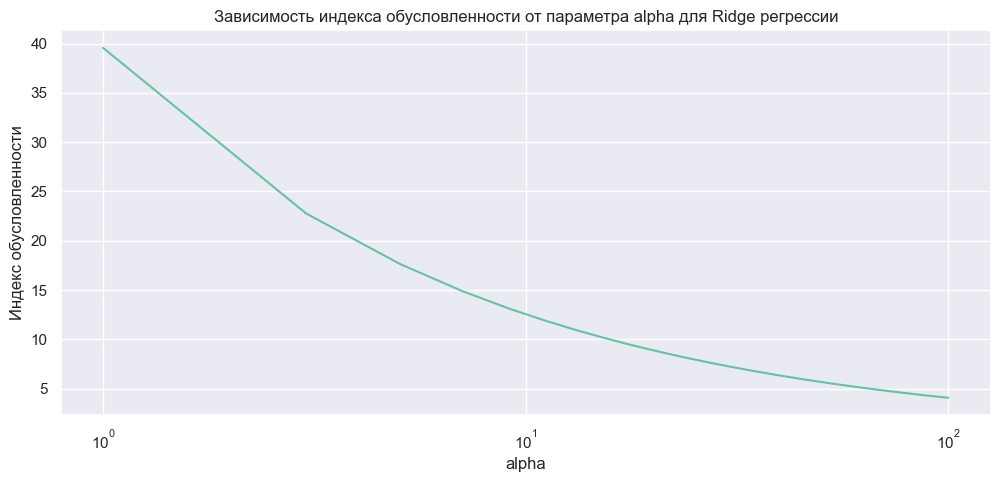

In [104]:
plt.figure(figsize=(12, 5))
plt.plot(alphas, CI)
plt.xlabel('alpha')
plt.ylabel('Индекс обусловленности')
plt.title('Зависимость индекса обусловленности от параметра alpha для Ridge регрессии')
plt.xticks(range(0, 110, 10))
plt.xscale('log')
plt.show()

При Ridge регрессии значения получаются намного лучше. Если исходить от материалов лекции, то при индексе > 30 наблюдается мультиколлинеарность, то есть при alpha около 4 и меньше наблюдается коллинеарность. Затем при увеличении alpha индекс убывает экспоненциально.

**3.** На обучающей выборке с помощью поиска по сетке определите наилучшие параметры для Ridge, Lasso, Elastic моделей. В качестве метрики качества используйте среднеквадратичную ошибку (MSE).

*Замечание.* Не забудьте, что при стандартизации была использована вся обучающая выборка, а внутри кросс-валидации на каждой итерации рассматривается своя валидационная выборка, которая не должна стандартизироваться по данным, посчитанным частично на ней самой. Вам может помочь [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Используйте его в качестве аргумента model

(По поводу logspace, на семинаре сказали, что с помощью linspace тоже можно ходить и учитывая, что я часто смещал сетку при эксперименте, ничего пропустить я не скорее всего не мог.)

In [92]:
def search(model_search):

    parameters_grid = {}
    model = Ridge()
    
    if model_search == 'Ridge':
        parameters_grid = {
        'model__alpha' : np.linspace(0.001, 2, num=1000),
        }
        model = Ridge()
    elif model_search == 'Lasso':
        parameters_grid = {
        'model__alpha' : np.linspace(0.001, 2, num=1000),
        }
        model = Lasso()
    elif model_search == 'Elastic':
        parameters_grid = {
        'model__alpha' : np.linspace(0.001, 2, num=500),
        'model__l1_ratio' : np.linspace(0.1, 1, num=25)
        }
        model = ElasticNet()

    # задаем стратегию кросс-валидации
    ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
    
    pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])

    # определяем поиск по сетке 
    gs = GridSearchCV(
        # модель для обучения
        estimator=pipeline,
        # сетка значений гиперпараметров
        param_grid=parameters_grid,
        # метрика качества, берем MSE
        scoring='neg_mean_squared_error',
        # GridSearch отлично параллелится, указываем количество параллельных джоб
        # -1 означает использование всех ядер
        n_jobs=-1,
        # стратегия кросс-валидации
        cv=ss,
        # сообщения с логами обучения: больше значение - больше сообщений
        verbose=1,
        # значение, присваиваемое scorer в случае ошибки при обучении
        error_score='raise'
    )
    return gs

In [93]:
gs_ridge = search('Ridge')
gs_lasso = search('Lasso')
gs_elastic = search('Elastic')

In [94]:
%%time
# выполняем поиск по сетке
gs_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
CPU times: user 811 ms, sys: 29 ms, total: 840 ms
Wall time: 1.41 s


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.00000000e-03, 3.00100100e-03, 5.00200200e-03, 7.00300300e-03,
       9.00400400e-03, 1.10050050e-02, 1.30060060e-02, 1.50070070e-02,
       1.700...
       1.95397698e+00, 1.95597798e+00, 1.95797898e+00, 1.95997998e+00,
       1.96198098e+00, 1.96398198e+00, 1.96598298e+00, 1.96798398e+00,
       1.96998498e+00, 1.97198599e+00, 1.97398699e+00, 1.97598799e+00,
       1.97798899e+00, 1.97998999e+00, 1.98199099e+00, 1.98399199e+00,
       1.98599299e+00, 1.98799399e+00, 1.98999499e+00, 1.99199600e+00,
       1.99399700e+00, 1.99599800e+00, 1.99799900e+00, 2.00000000e+00])},
             scoring='neg_mean_squared_error', verbose=1)

In [95]:
%%time
# выполняем поиск по сетке
gs_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+01, tolerance: 1.346e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.496e+01, tolerance: 1.386e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

CPU times: user 972 ms, sys: 32.2 ms, total: 1 s
Wall time: 1.69 s


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.00000000e-03, 3.00100100e-03, 5.00200200e-03, 7.00300300e-03,
       9.00400400e-03, 1.10050050e-02, 1.30060060e-02, 1.50070070e-02,
       1.700...
       1.95397698e+00, 1.95597798e+00, 1.95797898e+00, 1.95997998e+00,
       1.96198098e+00, 1.96398198e+00, 1.96598298e+00, 1.96798398e+00,
       1.96998498e+00, 1.97198599e+00, 1.97398699e+00, 1.97598799e+00,
       1.97798899e+00, 1.97998999e+00, 1.98199099e+00, 1.98399199e+00,
       1.98599299e+00, 1.98799399e+00, 1.98999499e+00, 1.99199600e+00,
       1.99399700e+00, 1.99599800e+00, 1.99799900e+00, 2.00000000e+00])},
             scoring='neg_mean_squared_error', verbose=1)

In [96]:
%%time
# выполняем поиск по сетке
gs_elastic.fit(X_train, y_train)

Fitting 5 folds for each of 12500 candidates, totalling 62500 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.098e+03, tolerance: 1.346e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.824e+03, tolerance: 1.315e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.828e+01, tolerance: 1.315e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.525e+01, tolerance: 1.458e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.972e+01, tolerance: 1.346e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.713e+01, tolerance: 1.315e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

CPU times: user 10.8 s, sys: 220 ms, total: 11 s
Wall time: 18 s


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', ElasticNet())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.00000000e-03, 5.00601202e-03, 9.01202405e-03, 1.30180361e-02,
       1.70240481e-02, 2.10300601e-02, 2.50360721e-02, 2.90420842e-02,...
       1.95593387e+00, 1.95993988e+00, 1.96394589e+00, 1.96795190e+00,
       1.97195792e+00, 1.97596393e+00, 1.97996994e+00, 1.98397595e+00,
       1.98798196e+00, 1.99198798e+00, 1.99599399e+00, 2.00000000e+00]),
                         'model__l1_ratio': array([0.1   , 0.1375, 0.175 , 0.2125, 0.25  , 0.2875, 0.325 , 0.3625,
       0.4   , 0.4375, 0.475 , 0.5125, 0.55  , 0.5875, 0.625 , 0.6625,
       0.7   , 0.7375, 0.775 , 0.8125, 0.85  , 0.8875, 0.925 , 0.9625,
       1.    ])},
             scoring='neg_mean_squared_error', verbose=1)

Найдем наилучшие гиперпараметры.

In [97]:
gs_ridge.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=0.001))])

In [98]:
gs_lasso.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.001))])

In [99]:
gs_elastic.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ElasticNet(alpha=0.001, l1_ratio=1.0))])

Исправлено: я пытался двигать левый параметр сетки, но по итогу обучение все равно всегда выбирало самую границу сетки как наилучший параметр. Не стал показывать это здесь, чтобы не загромождать работу. И вообще на семинаре говорили, что так часто происходит, что оптимальный параметр лежит на границе. Ведь если в аналитическом решении матрица не близка к вырожденной, то регуляриация по сути не требуется.

На тестовой части данных сравните качество моделей с оптимальными параметрами. Какая модель дала лучший результат?

Исправил и сделал показ чисел с плавающей точкой удобнее.

In [100]:
model = Ridge(alpha=1e-03)
model.fit(X_train_standard, y_train)
print('MSE для Ridge', f"{metrics.mean_squared_error(y_test, model.predict(X_test_standard)):.5f}")

MSE для Ridge 30.91088


In [101]:
model = Lasso(alpha=1e-03)
model.fit(X_train_standard, y_train)
print('MSE для Lasso', f"{metrics.mean_squared_error(y_test, model.predict(X_test_standard)):.5f}")

MSE для Lasso 30.91827


In [102]:
model = ElasticNet(alpha=0.001, l1_ratio=1)
model.fit(X_train_standard, y_train)
print('MSE для ElasticNet', f"{metrics.mean_squared_error(y_test, model.predict(X_test_standard)):.5f}")

MSE для ElasticNet 30.91827


Все модели дали примерно один и тот же результат, но Ridge регрессия все таки хоть совсем на чуть чуть, но показала лучший результат.

**4.** Сделайте общий вывод по задаче.

**Вывод:** Мы посмотрели на зависимость значений коэффициентов от гиперпараметров для регрессий. Также по индексу обусловленности мы сделали вывод, что данные мультиколлинеарны, но применив Ridge регресиию заметили, что индекс стал намного меньше, то есть Ridge регрессия хорошо справилась с мультиколлинеарностью исходных данных. Затем с помощью сетки нашли лучшие гиперпараметры для наших моделей и посчитали качество моделей с оптимальными гиперпараметрами. Гиперпараметры получились очень маленькими, что может говорить о том, что в целом обычная линейная регрессия сработала бы также. Качетсво моделей получились примерно одинаковыми (но Lasso получилась все таки чуть лучше), что также может говорить о том, что линейная регрессия сработала бы также.

## Задача 4.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс, например, в `GridSearchCV`.

**1.** Задача оптимизации для регрессии Хьбера выглядит следующим образом:
$$\large{\sum_{i=1}^n R(Y_i - x_i^T\theta) \rightarrow \min_\theta},$$
где $R(x) = \frac{x^2}{2} I\{|x| < c\} + c (|x| - \frac{c}{2})I\{|x| < c\},$ &mdash; функция потерь Хьюбера.

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

**2.** Реализуем теперь класс

In [ ]:
class HuberRegression(BaseEstimator):
    '''
    Класс, реализующий линейную регрессию, используя функцию потерь Хьюбера.
    '''
    
    def __init__(self, c=1, fit_intercept=True, max_iter=100):
        '''
        :param c: константа c из определения функции потерь Хьюбера
        :param fit_intercept: добавлять ли константный признак
        :param max_iter: макс. количество итераций процедуры оптимизации
        '''
        
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter        
        
    def fit(self, X, y):
        '''
        Функция обучения модели.
        
        :param X: матрица признаков
        :param y: значения целевой паременной
        '''
        
        <...>
        return self
        
    def predict(self, X):
        '''
        Функция применения модели.
        
        :param X: матрица признаков.
        :return pred: предсказание отклика для объектов из X
        '''
        
        pred = <...>
        return pred

**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [ ]:
<...>

Посмотрите на зависимость целевой переменной от каждого признака. Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать? 

In [ ]:
<...>

**2.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). Что можно сказать о качестве нашей модели?

In [ ]:
<...>

**3.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE. Что изменилось? 

In [ ]:
<...>

**4.** Используя поиск по сетке, подберите оптимальное значение гиперпараметра $c$ нашей модели. Какую метрику стоит использовать? Почему?

In [ ]:
<...>

**5.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака. Что можно заметить на этих графиках?

In [ ]:
<...>

**Вывод:** <...>